# Basic Model for TimeSeries
- MA, AR, ARMA, ARIMA Modle Simulations
- 각 시계열 모델링의 시뮬레이션을 돌려보면서, 각각의 plot 그림을 눈에 익히고, 실제로 시계열 데이터를 만났을 때의 분석력을 높이려는 연습을 합니다.

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

## 1차 MA
$$MA(1) : Y_t = \epsilon_t + \theta \epsilon_{t-1}$$

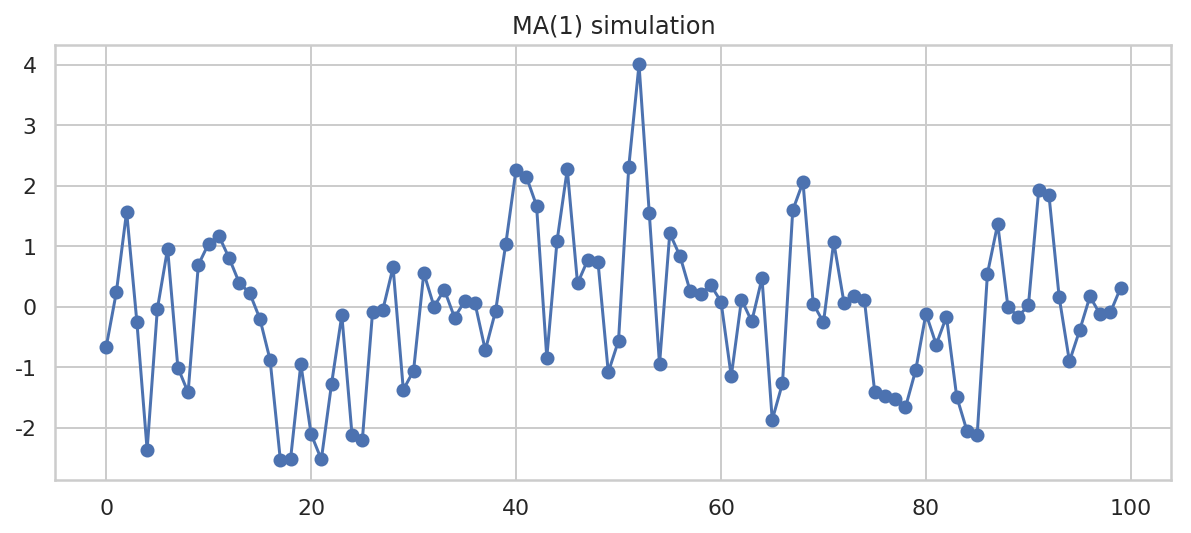

In [2]:
# ArmaProcess(ar, ma)
theta = 0.7

ar = [1]
ma = [1, theta]
process = sm.tsa.ArmaProcess(ar, ma)

y = process.generate_sample(100, burnin=10)

plt.figure(figsize=(10, 4))
plt.plot(y, 'o-')
plt.title("MA(1) simulation")
plt.show()

### MA(1) 차 모형의 ACF
- Time lag 이 1 일 때, Correlation 이 있고, 2 이상부터는 유의수준 안에서 0인 것을 확인 할 수 있다.
$$\rho_1 = \frac{\theta}{1 + \theta^2}$$
$$\rho_k = 0, k > 1$$

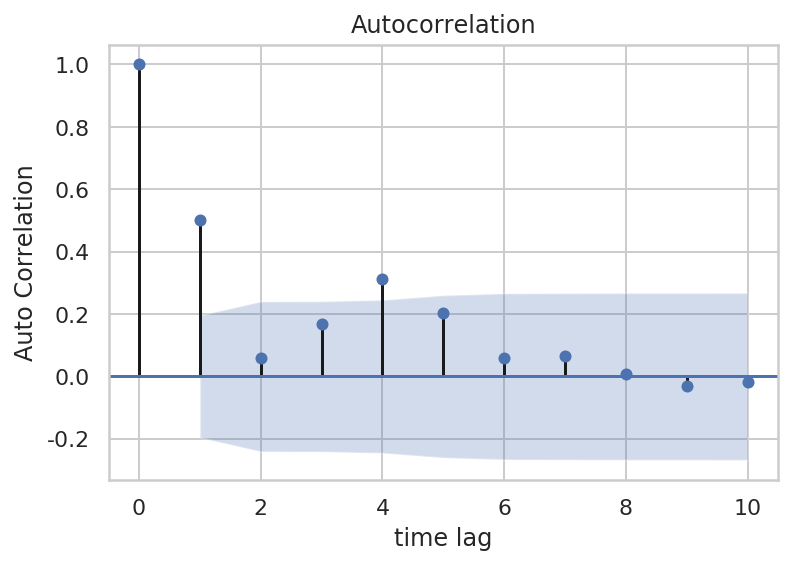

In [3]:
sm.graphics.tsa.plot_acf(y, lags=10)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.show()

## 2차 MA
$$MA(2) : Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2}$$

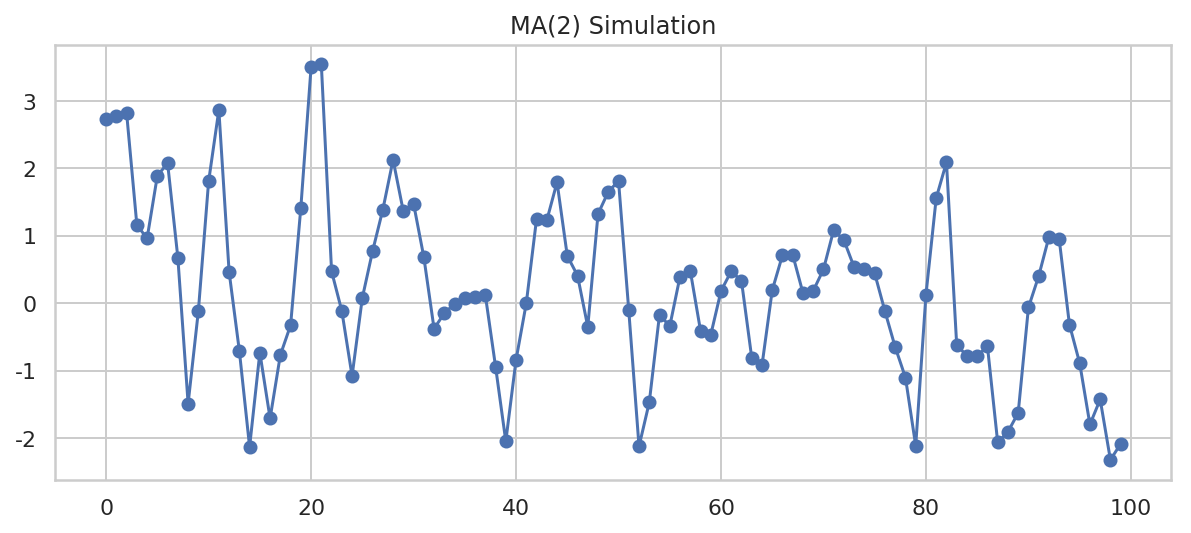

In [4]:
theta1 = 0.9
theta2 = 0.7

ar = [1]
ma = [1, theta1, theta2]

process = sm.tsa.ArmaProcess(ar, ma)
y = process.generate_sample(100, burnin=10)

plt.figure(figsize=(10, 4))
plt.plot(y, 'o-')
plt.title("MA(2) Simulation")
plt.show()

### MA(2) 모형의 ACF
- MA 2차의 경우 이론적으로는 lag 2 까지, auto correlation 이 0이 아닌 값이 나와야 하지만, 아래 그래프는 그렇지 않다.
- 이 경우, 실제로 MA 1차, 2차 각각 모델링 해볼 수 있겠다.

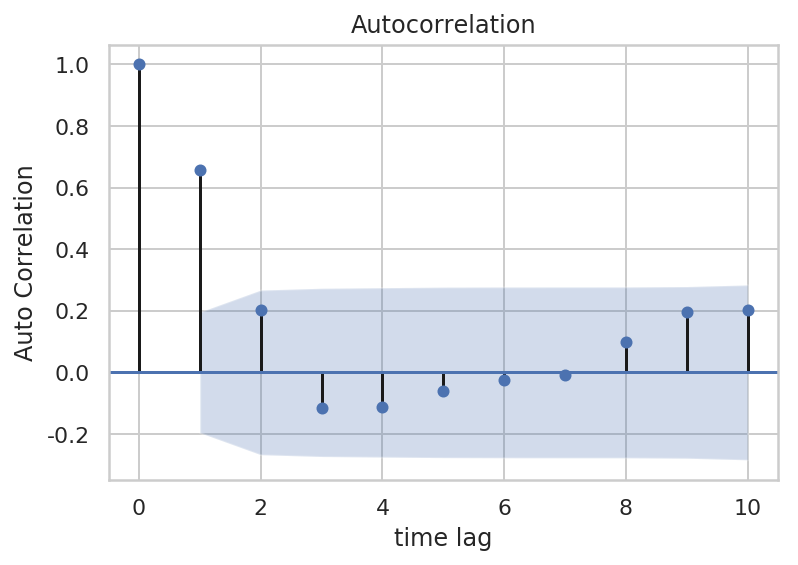

In [5]:
sm.graphics.tsa.plot_acf(y, lags=10)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.show()

## AR 모형

### AR(1) 모형

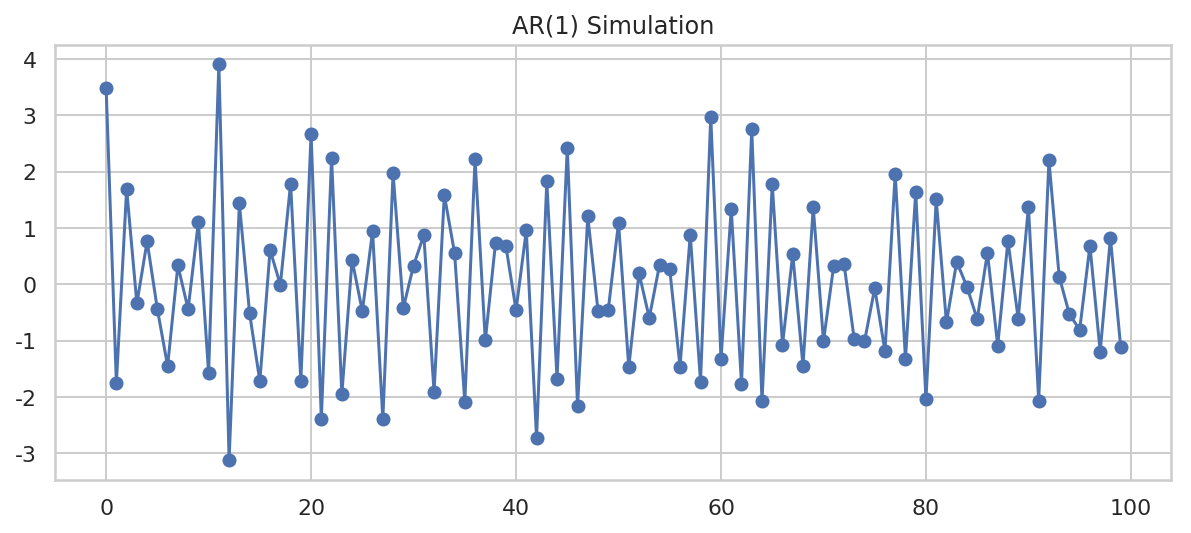

In [6]:
phi = 0.9

ar = [1, phi]
ma = [1]

process = sm.tsa.ArmaProcess(ar, ma)
y = process.generate_sample(100, burnin=10)

plt.figure(figsize=(10, 4))
plt.plot(y, 'o-')
plt.title("AR(1) Simulation")
plt.show()

### AR(1) 모형의 ACF
- AR(1) 모형의 ACF 의 경우 MA 와는 다르게 Auto Correlation 값이 지수적으로 감소 하는 것을 볼 수 있다.

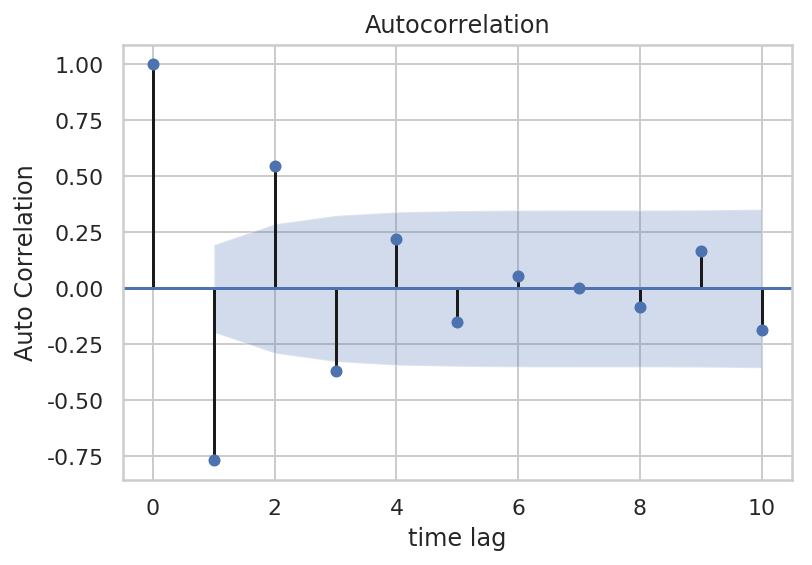

In [7]:
sm.graphics.tsa.plot_acf(y, lags=10)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.show()

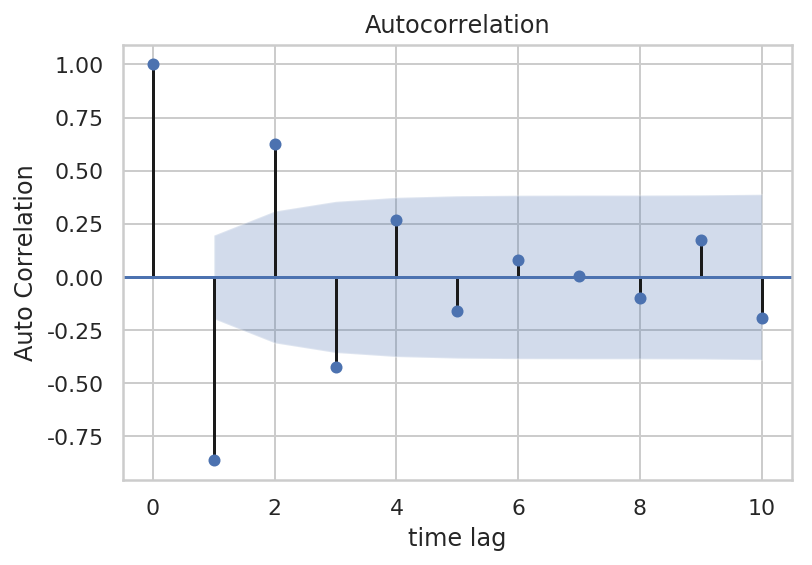

In [8]:
y = np.diff(y)
sm.graphics.tsa.plot_acf(y, lags=10)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.show()

### AR(2) 모형

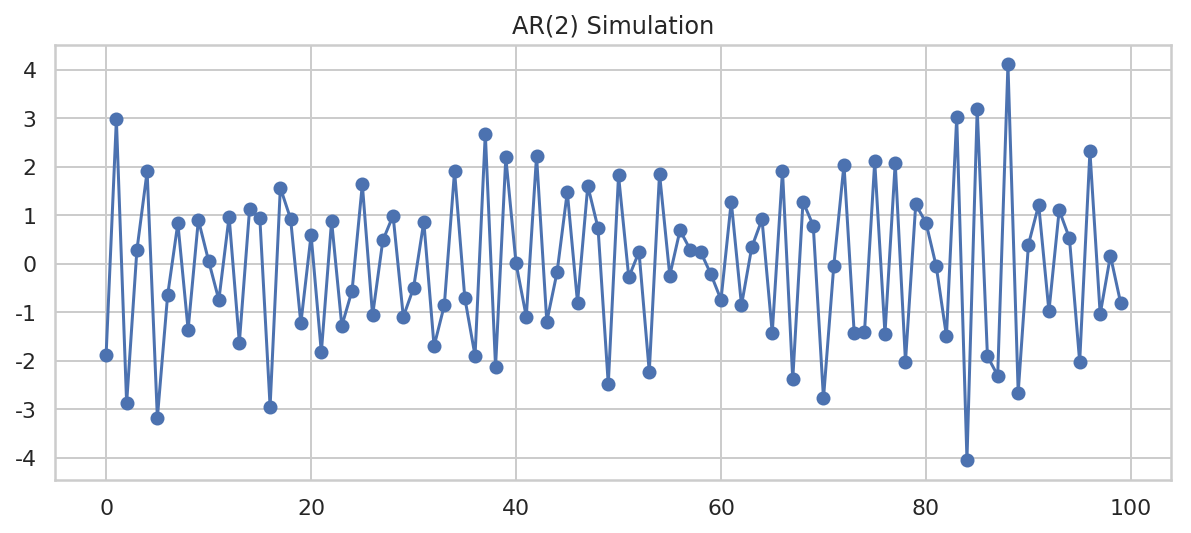

In [8]:
phi1 = 0.9
phi2 = 0.6

ar = [1, phi1, phi2]
ma = [1]

process = sm.tsa.ArmaProcess(ar, ma)
y = process.generate_sample(100, burnin=10)

plt.figure(figsize=(10, 4))
plt.plot(y, 'o-')
plt.title("AR(2) Simulation")
plt.show()

### AR(2) 모형의 ACF

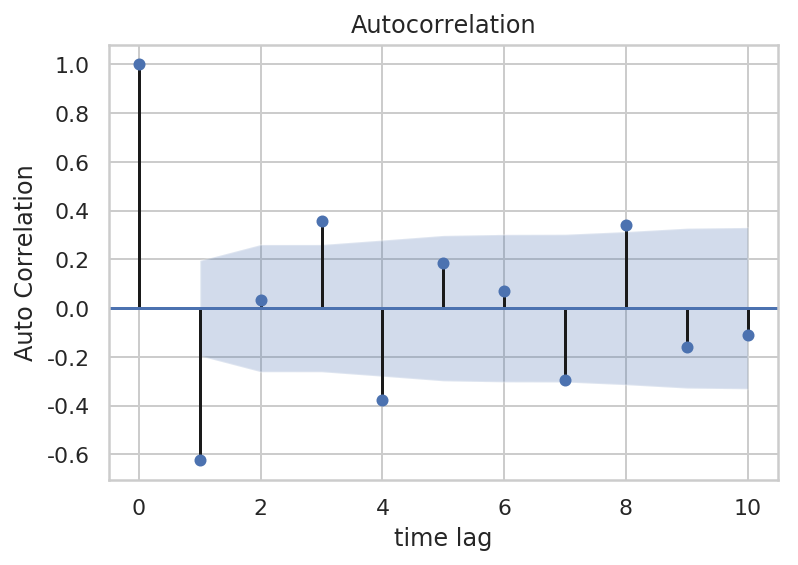

In [9]:
sm.graphics.tsa.plot_acf(y, lags=10)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.show()

## ARMA 모델
### ARMA(1, 1)

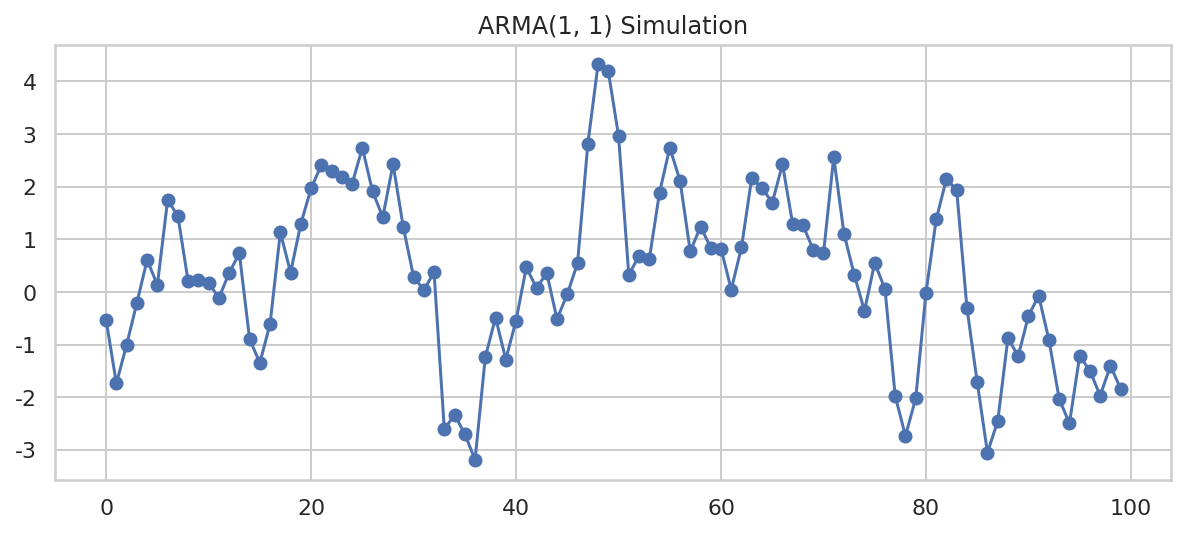

In [10]:
phi = 0.7
theta = 0.4

ar = [1, -phi]
ma = [1, theta]

process = sm.tsa.ArmaProcess(ar, ma)
y = process.generate_sample(100, burnin=10)

plt.figure(figsize=(10, 4))
plt.plot(y, 'o-')
plt.title("ARMA(1, 1) Simulation")
plt.show()

### ARMA(1,1) 의 ACF
- ARMA 의 ACF 의 경우, ACF 만 봐서는 AR 모델과 구분하기 힘들다.

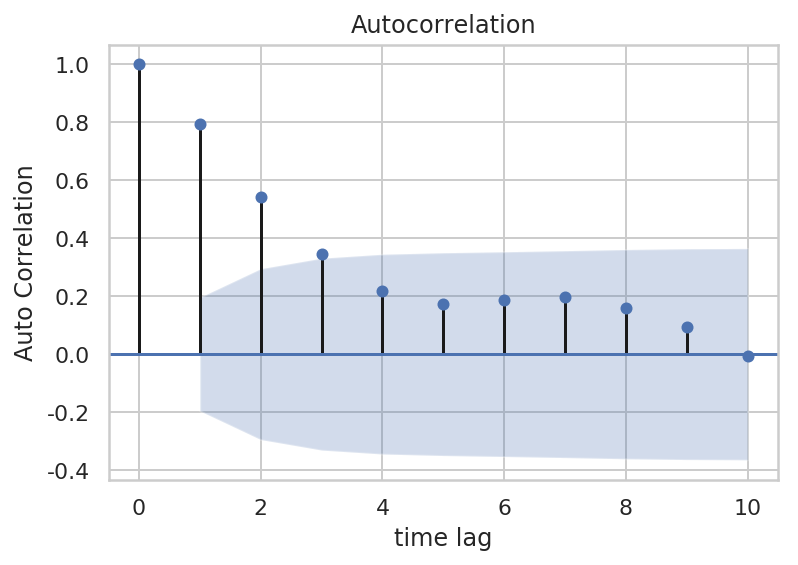

In [11]:
sm.graphics.tsa.plot_acf(y, lags=10)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.show()

## IMA(1,1) 모형
- 1번 차분하여 MA(1) 모형

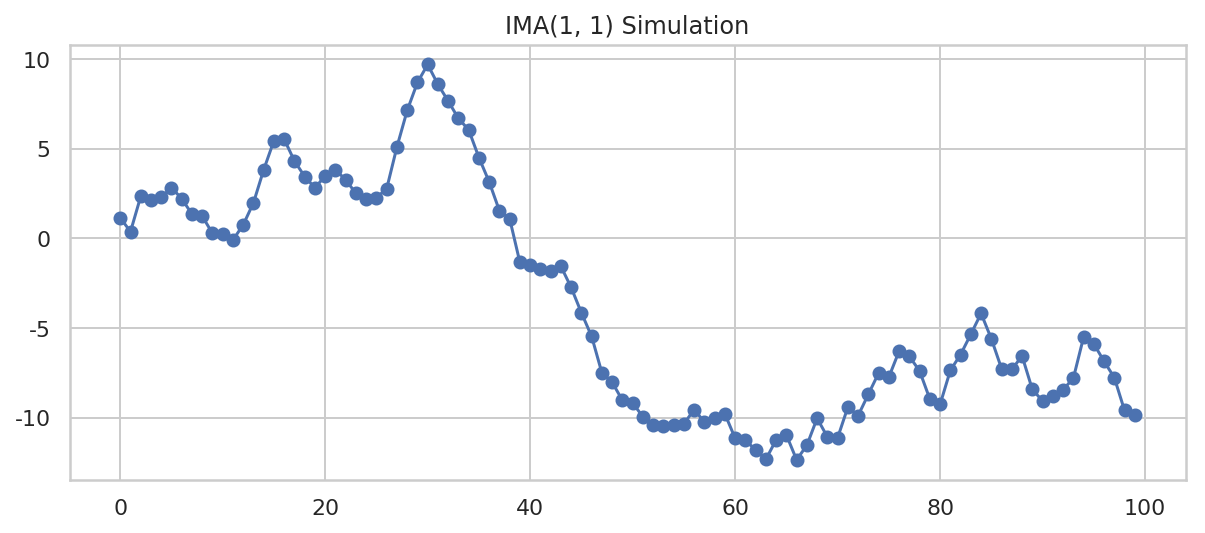

In [12]:
theta = 0.4

ar = [1]
ma = [1, theta]

process = sm.tsa.ArmaProcess(ar, ma)
y = process.generate_sample(100, burnin=10).cumsum()

plt.figure(figsize=(10, 4))
plt.plot(y, 'o-')
plt.title("IMA(1, 1) Simulation")
plt.show()

### IMA(1, 1) 의 ACF, 차분한 값의 ACF
- 본 sample 의 ACF 를 그리면, AR 과 크게 다르지 않는 것을 확인할 수 있다.
- 하지만, 차분한 결과의 ACF 를 그리면  lag1 이후의 값은 모두 0인 것을 확인 할 수 있다.

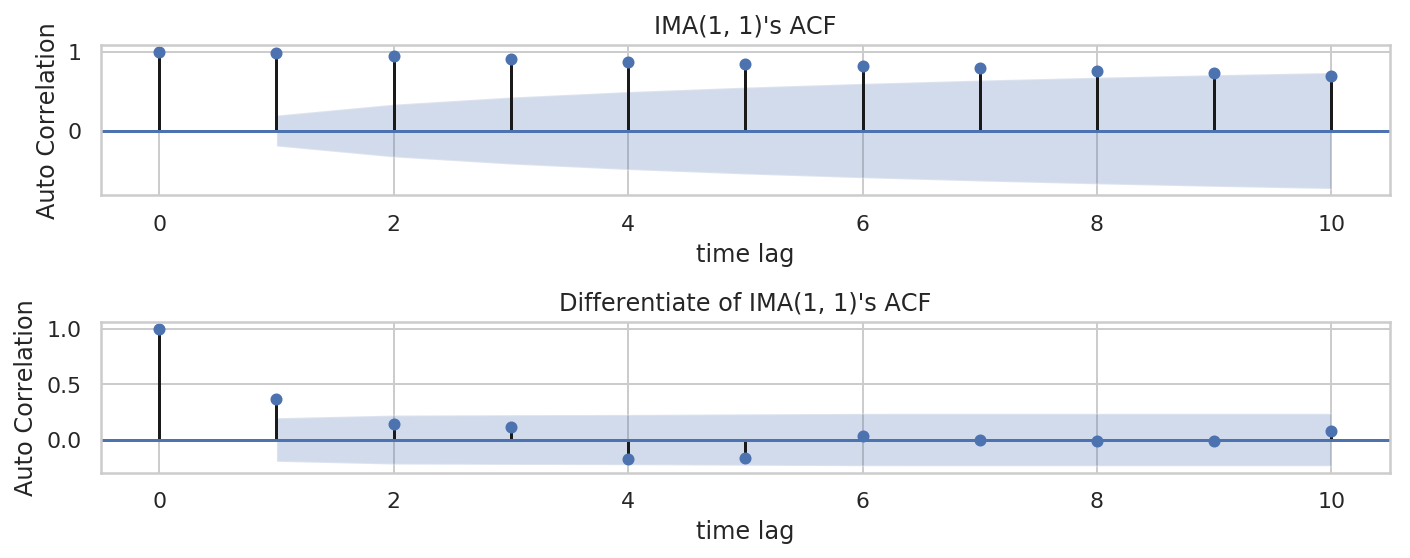

In [13]:
plt.figure(figsize=(10, 4))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(y, lags=10, ax=ax)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.title("IMA(1, 1)'s ACF")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(np.diff(y), lags=10, ax=ax)
plt.xlabel("time lag")
plt.ylabel("Auto Correlation")
plt.title("Differentiate of IMA(1, 1)'s ACF")

plt.tight_layout()
plt.show()